# Analyzing 2017 New Coder Survey Data

In this project, we will be exploring what markets would be the best for an e-learning company that offers courses on various diciplines to advertise in. The main domains the company covers are web and mobile development with others like data science, game development, etc. also supported.

In order to achieve this, we will use [this](https://github.com/freeCodeCamp/2017-new-coder-survey) survey data from [freeCodeCamp](https://www.freecodecamp.org/learn)'s 2017 survey. They have surveyed more than 20,000 participants.

# 1. Exploring and Cleaning the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline
plt.style.use('ggplot')

In [2]:
new_coders = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)
new_coders.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we see, the dataset contains 136 columns... That's a bit too much so we will only take the columns that might be useful to us.

In [3]:
new_coders.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

In [4]:
relevant = new_coders[["Age", "CityPopulation", "CountryLive", "EmploymentField",
                       "EmploymentStatus", "Gender", "GenderOther", "HasChildren",
                       "HasHighSpdInternet", "Income", "IsEthnicMinority",
                       "JobInterestBackEnd", "JobInterestDataEngr", 
                       "JobInterestDataSci", "JobInterestDevOps", "JobInterestFrontEnd", 
                       "JobInterestFullStack", "JobInterestGameDev", "JobInterestInfoSec",
                       "JobInterestMobile", "JobInterestQAEngr", "JobInterestUX",
                       "JobPref", "JobRelocateYesNo", "MoneyForLearning",
                       "SchoolDegree", "SchoolMajor"]].copy()
relevant.head()

,Age,CityPopulation,CountryLive,EmploymentField,EmploymentStatus,Gender,GenderOther,HasChildren,HasHighSpdInternet,Income,...,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,MoneyForLearning,SchoolDegree,SchoolMajor
0,27.0,more than 1 million,Canada,software development and IT,Employed for wages,female,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,150.0,"some college credit, no degree",NaN
1,34.0,"less than 100,000",United States of America,NaN,Not working but looking for work,male,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,80.0,"some college credit, no degree",NaN
2,21.0,more than 1 million,United States of America,software development and IT,Employed for wages,male,NaN,NaN,1.0,13000.0,...,NaN,NaN,1.0,NaN,NaN,work for a medium-sized company,1.0,1000.0,high school diploma or equivalent (GED),NaN
3,26.0,"between 100,000 and 1 million",Brazil,software development and IT,Employed for wages,male,NaN,0.0,1.0,24000.0,...,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,0.0,"some college credit, no degree",NaN
4,20.0,"between 100,000 and 1 million",Portugal,NaN,Not working but looking for work,female,NaN,NaN,1.0,NaN,...,NaN,1.0,1.0,NaN,NaN,work for a multinational corporation,1.0,0.0,bachelor's degree,Information Technology


This way, we now have columns that are more relevant to us. To prevent overcrowding, let's merge the Job Interest columns into one:

In [5]:
job_int_pattern = "JobInterest(\w+)"
job_interests_list = [re.findall(job_int_pattern, column)[0] for column in relevant.columns if re.findall(job_int_pattern, column) != []]
print(job_interests_list)

['BackEnd', 'DataEngr', 'DataSci', 'DevOps', 'FrontEnd', 'FullStack', 'GameDev', 'InfoSec', 'Mobile', 'QAEngr', 'UX']


In [6]:
relevant.rename({"JobInterestBackEnd": "BackEnd", "JobInterestDataEngr": "DataEngr", 
                 "JobInterestDataSci": "DataSci", "JobInterestDevOps": "DevOps",
                 "JobInterestFrontEnd": "FrontEnd", "JobInterestFullStack": "FullStack",
                 "JobInterestGameDev": "GameDev", "JobInterestInfoSec": "InfoSec",
                 "JobInterestMobile": "Mobile", "JobInterestQAEngr": "QAEngr", "JobInterestUX": "UX"},
                 axis=1, inplace=True)

for job in job_interests_list: #We couldn't slice it with the list because of a warning, we will just loop instead
    relevant[job].replace({np.nan: False, 1.0: True}, inplace=True)

def interest_merger(row):
    #Function takes in a row, appends all job interests in our job_interests_list from before that have values "True"
    job_interest = []
    for job in job_interests_list:
        if row.loc[job] == True:
            job_interest.append(job)
    if len(job_interest) > 0:
        return job_interest
    else:
        return np.nan

relevant["Job Interests"] = relevant.apply(interest_merger, axis=1)
relevant["Job Interests"].head()

0                                                NaN
1                                        [FullStack]
2     [BackEnd, DevOps, FrontEnd, FullStack, Mobile]
3                     [BackEnd, FrontEnd, FullStack]
4    [BackEnd, FrontEnd, FullStack, InfoSec, Mobile]
Name: Job Interests, dtype: object

Now, we will drop the columns we won't need anymore:

In [7]:
relevant.drop(job_interests_list, axis=1, inplace=True)
print(relevant.columns)

Index(['Age', 'CityPopulation', 'CountryLive', 'EmploymentField',
       'EmploymentStatus', 'Gender', 'GenderOther', 'HasChildren',
       'HasHighSpdInternet', 'Income', 'IsEthnicMinority', 'JobPref',
       'JobRelocateYesNo', 'MoneyForLearning', 'SchoolDegree', 'SchoolMajor',
       'Job Interests'],
      dtype='object')


Let's take a look at other columns to see if they need any cleaning:

In [8]:
relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 15367 non-null  float64
 1   CityPopulation      15354 non-null  object 
 2   CountryLive         15336 non-null  object 
 3   EmploymentField     8116 non-null   object 
 4   EmploymentStatus    14345 non-null  object 
 5   Gender              15454 non-null  object 
 6   GenderOther         55 non-null     object 
 7   HasChildren         3858 non-null   float64
 8   HasHighSpdInternet  15380 non-null  float64
 9   Income              7623 non-null   float64
 10  IsEthnicMinority    15293 non-null  float64
 11  JobPref             13483 non-null  object 
 12  JobRelocateYesNo    6503 non-null   float64
 13  MoneyForLearning    16577 non-null  float64
 14  SchoolDegree        15368 non-null  object 
 15  SchoolMajor         8727 non-null   object 
 16  Job 

In [9]:
relevant.Age.describe()

count    15367.000000
mean        27.691872
std          8.559239
min          0.000000
25%         22.000000
50%         26.000000
75%         32.000000
max         90.000000
Name: Age, dtype: float64

In [10]:
relevant.Age.value_counts(dropna=False).sort_index(ascending=False)

90.0       1
76.0       1
75.0       1
73.0       1
72.0       2
        ... 
3.0        1
2.0        2
1.0        2
0.0        4
NaN     2808
Name: Age, Length: 74, dtype: int64

As we can see, there are around 2808 missing values in column "Age". We will come back for these later. For now, we will get rid of outliers like "0" or "1" since they are low in number.

In [11]:
relevant = relevant[(relevant["Age"] >= 8) | (relevant["Age"].isnull())]
relevant.Age.value_counts(dropna=False).sort_index(ascending=False).tail()

12.0      30
11.0       7
10.0       3
8.0        2
NaN     2808
Name: Age, dtype: int64

Now that we only have people who are literate, we can move on to the next columns.

In [12]:
relevant.CityPopulation.value_counts(dropna=False)

more than 1 million              6530
between 100,000 and 1 million    5276
less than 100,000                3541
NaN                              2818
Name: CityPopulation, dtype: int64

As we can see, this data is ordinal and contains 202 missing values. Categories seem to have names that might overcrowd a plot later on, so we will replace them with shorter names like "Great", "Small" and "Medium" instead.

In [13]:
relevant["CityPopulation"].replace({"more than 1 million": "Great",
                                    "between 100,000 and 1 million": "Medium",
                                    "less than 100,000": "Small"}, inplace=True)
relevant.CityPopulation.value_counts(dropna=False)

Great     6530
Medium    5276
Small     3541
NaN       2818
Name: CityPopulation, dtype: int64

Moving on with the other columns:

In [14]:
relevant.CountryLive.value_counts(dropna=False)

United States of America    5790
NaN                         2837
India                       1400
United Kingdom               757
Canada                       615
                            ... 
Vanuatu                        1
Virgin Islands (British)       1
Tajikistan                     1
Burundi                        1
Sierra Leone                   1
Name: CountryLive, Length: 173, dtype: int64

In [15]:
relevant.EmploymentField.value_counts(dropna=False).sort_index()

architecture or physical engineering       202
arts, entertainment, sports, or media      372
construction and extraction                129
education                                  626
farming, fishing, and forestry              38
finance                                    264
food and beverage                          386
health care                                324
law enforcement and fire and rescue         40
legal                                       70
office and administrative support          361
sales                                      415
software development and IT               4718
transportation                             167
NaN                                      10053
Name: EmploymentField, dtype: int64

In [16]:
relevant.EmploymentStatus.value_counts(dropna=False).sort_index()

A stay-at-home parent or homemaker       214
Doing an unpaid internship               339
Employed for wages                      7620
Military                                  87
Not working and not looking for work     906
Not working but looking for work        3147
Retired                                   32
Self-employed business owner             534
Self-employed freelancer                1198
Unable to work                           261
NaN                                     3827
Name: EmploymentStatus, dtype: int64

In [17]:
relevant.Gender.value_counts(dropna=False).sort_index()

agender           37
female          2930
genderqueer       71
male           12340
trans             68
NaN             2719
Name: Gender, dtype: int64

In [18]:
relevant.GenderOther.value_counts(dropna=False).sort_index()

54                                                                        1
Apache Helicopter                                                         1
Apache attack helicopter                                                  1
Apache helicopter                                                         1
Appache Attack Helecopter                                                 1
Attack Helicopter                                                         2
AttackHelicopter                                                          1
Bigender                                                                  1
Cis White Male                                                            1
Computer                                                                  1
Genderfluid                                                               1
Genderqueer foxkin demifluid trans-shemale intergay multi bisexual        1
Hawk                                                                      1
Irrelevant  

Shoutout to all the people with gender "Apache Helicopter" and variants. Also, there are more than 2 genders. We will be removing this column, too. **See in the code cell below how easy it is to delete clowns who say there are only 2 genders from this dataset:**

In [19]:
relevant.drop("GenderOther", axis=1, inplace=True)
relevant.columns

Index(['Age', 'CityPopulation', 'CountryLive', 'EmploymentField',
       'EmploymentStatus', 'Gender', 'HasChildren', 'HasHighSpdInternet',
       'Income', 'IsEthnicMinority', 'JobPref', 'JobRelocateYesNo',
       'MoneyForLearning', 'SchoolDegree', 'SchoolMajor', 'Job Interests'],
      dtype='object')

In [20]:
relevant.HasChildren.value_counts(dropna=False).sort_index()

0.0     1504
1.0     2350
NaN    14311
Name: HasChildren, dtype: int64

Since we have too many missing values and the column is not directly relevant to our topic, we will drop this one, too.

In [21]:
relevant.drop("HasChildren", axis=1, inplace=True)
relevant.columns

Index(['Age', 'CityPopulation', 'CountryLive', 'EmploymentField',
       'EmploymentStatus', 'Gender', 'HasHighSpdInternet', 'Income',
       'IsEthnicMinority', 'JobPref', 'JobRelocateYesNo', 'MoneyForLearning',
       'SchoolDegree', 'SchoolMajor', 'Job Interests'],
      dtype='object')

In [22]:
relevant.HasHighSpdInternet.value_counts(dropna=False).sort_index()

0.0     2230
1.0    13143
NaN     2792
Name: HasHighSpdInternet, dtype: int64

As we can see, this column has only a few missing values compared to its size. Therefore, we will leave this as is for now, too.

In [23]:
relevant.Income.describe()

count       7622.000000
mean       43152.717791
std        61799.271199
min         6000.000000
25%        17000.000000
50%        33000.000000
75%        55000.000000
max      1000000.000000
Name: Income, dtype: float64

In [24]:
relevant.Income.value_counts(dropna=False).sort_index()

6000.0         204
6120.0           1
6150.0           1
6163.0           1
6200.0           1
             ...  
602228.0         1
700000.0         1
945000.0         1
1000000.0       20
NaN          10543
Name: Income, Length: 586, dtype: int64

As we can see above, very few people have stated their salaries as the second and second last values compared to the first and very last ones. This could be because of these values being limits to the user inputs. We will keep them as they are for now.

In [25]:
relevant.IsEthnicMinority.value_counts(dropna=False).sort_index()

0.0    11648
1.0     3638
NaN     2879
Name: IsEthnicMinority, dtype: int64

This column again has very few missing values. We will come back and handle these missing values later so that we can convert the column into Boolean type.

In [26]:
relevant.JobPref.value_counts(dropna=False).sort_index()

freelance                               2620
start your own business                 2779
work for a government                    366
work for a medium-sized company         2977
work for a multinational corporation    1700
work for a nonprofit                     834
work for a startup                      2199
NaN                                     4690
Name: JobPref, dtype: int64

In [27]:
relevant.JobRelocateYesNo.value_counts(dropna=False).sort_index()

0.0     1482
1.0     5017
NaN    11666
Name: JobRelocateYesNo, dtype: int64

In [28]:
relevant.MoneyForLearning.value_counts(dropna=False).sort_index()

0.0         7983
1.0           22
2.0            4
3.0            8
4.0            7
            ... 
120000.0       1
170000.0       1
200000.0       2
210000.0       1
NaN         1596
Name: MoneyForLearning, Length: 334, dtype: int64

When we look at the richer side of this scale, we see a crazy outlier such as 200000. No one probably wants to invest that much money into e-learning. Let's generate descriptive statistics using Series.describe():

In [29]:
relevant.MoneyForLearning.describe()

count     16569.000000
mean        956.850504
std        5003.638370
min           0.000000
25%           0.000000
50%          10.000000
75%         200.000000
max      210000.000000
Name: MoneyForLearning, dtype: float64

According to [this](http://www.arcytech.org/coursera/) article, Coursera's specialized programs last 4-6 months and cost between \\$39-\\$79 per month on average. So, one would spend \\$474 at most. Let's assume that we will charge \\$5000 at most with all the consulting and other kind of services we might be offering **including** additional resources the students might need to refer to. We will turn back after we drop or fill missing values from other columns and we will see if we will still feel the need to ditch values above \\$5000 and below \\$20.

In [30]:
relevant.SchoolDegree.value_counts(dropna=False).sort_index()

Ph.D.                                        132
associate's degree                           641
bachelor's degree                           5848
high school diploma or equivalent (GED)     1871
master's degree (non-professional)          1468
no high school (secondary school)            407
professional degree (MBA, MD, JD, etc.)      775
some college credit, no degree              2602
some high school                            1112
trade, technical, or vocational training     504
NaN                                         2805
Name: SchoolDegree, dtype: int64

In [31]:
relevant.SchoolMajor.value_counts(dropna=False).sort_values(ascending=False)

NaN                                       9444
Computer Science                          1344
Information Technology                     382
Electrical and Electronics Engineering     284
Economics                                  211
                                          ... 
Aromatherapy, Herbalism, and Reiki           1
School Librarian                             1
Office Management                            1
Acupuncture                                  1
Human Services                               1
Name: SchoolMajor, Length: 472, dtype: int64

Now that we're done with exploring the columns, we will check out the missing values and handle them.

In [32]:
relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18165 entries, 0 to 18174
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 15357 non-null  float64
 1   CityPopulation      15347 non-null  object 
 2   CountryLive         15328 non-null  object 
 3   EmploymentField     8112 non-null   object 
 4   EmploymentStatus    14338 non-null  object 
 5   Gender              15446 non-null  object 
 6   HasHighSpdInternet  15373 non-null  float64
 7   Income              7622 non-null   float64
 8   IsEthnicMinority    15286 non-null  float64
 9   JobPref             13475 non-null  object 
 10  JobRelocateYesNo    6499 non-null   float64
 11  MoneyForLearning    16569 non-null  float64
 12  SchoolDegree        15360 non-null  object 
 13  SchoolMajor         8721 non-null   object 
 14  Job Interests       7921 non-null   object 
dtypes: float64(6), object(9)
memory usage: 2.2+ MB


As we can see, some columns have almost half of their values missing. These columns include:
* Employment Field
* Income
* Job Relocation (Yes/No)
* School Major

Since these columns are not that directly related to our topic and have a lot of missing values, we will drop them.

In [33]:
relevant.drop(columns=["EmploymentField", "Income", "JobRelocateYesNo", "SchoolMajor"], inplace=True)

In [34]:
relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18165 entries, 0 to 18174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 15357 non-null  float64
 1   CityPopulation      15347 non-null  object 
 2   CountryLive         15328 non-null  object 
 3   EmploymentStatus    14338 non-null  object 
 4   Gender              15446 non-null  object 
 5   HasHighSpdInternet  15373 non-null  float64
 6   IsEthnicMinority    15286 non-null  float64
 7   JobPref             13475 non-null  object 
 8   MoneyForLearning    16569 non-null  float64
 9   SchoolDegree        15360 non-null  object 
 10  Job Interests       7921 non-null   object 
dtypes: float64(4), object(7)
memory usage: 1.7+ MB


From the columns left, we will first choose people who has job interests since that is directly related to our topic.

In [35]:
chosen_ones = relevant[relevant["Job Interests"].notnull()].copy()
chosen_ones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 1 to 18174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6649 non-null   float64
 1   CityPopulation      6647 non-null   object 
 2   CountryLive         6646 non-null   object 
 3   EmploymentStatus    6114 non-null   object 
 4   Gender              6701 non-null   object 
 5   HasHighSpdInternet  6672 non-null   float64
 6   IsEthnicMinority    6614 non-null   float64
 7   JobPref             7843 non-null   object 
 8   MoneyForLearning    7269 non-null   float64
 9   SchoolDegree        6652 non-null   object 
 10  Job Interests       7921 non-null   object 
dtypes: float64(4), object(7)
memory usage: 742.6+ KB


Now that we have prioritized thier job interests, we will decide on a threshold to drop rows that contain too many missing values.

In [36]:
chosen_ones.dropna(axis=0, thresh=5, inplace=True)
chosen_ones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 1 to 18174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6648 non-null   float64
 1   CityPopulation      6645 non-null   object 
 2   CountryLive         6645 non-null   object 
 3   EmploymentStatus    6114 non-null   object 
 4   Gender              6696 non-null   object 
 5   HasHighSpdInternet  6669 non-null   float64
 6   IsEthnicMinority    6614 non-null   float64
 7   JobPref             6685 non-null   object 
 8   MoneyForLearning    6268 non-null   float64
 9   SchoolDegree        6651 non-null   object 
 10  Job Interests       6745 non-null   object 
dtypes: float64(4), object(7)
memory usage: 632.3+ KB


We will now go back to column "MoneyForLearning".

In [37]:
chosen_ones.MoneyForLearning.describe()

count      6268.000000
mean        899.633057
std        4963.441575
min           0.000000
25%           0.000000
50%          10.000000
75%         200.000000
max      200000.000000
Name: MoneyForLearning, dtype: float64

In [38]:
potential_customers = chosen_ones[(chosen_ones["MoneyForLearning"] <= 5000) &(chosen_ones["MoneyForLearning"] > 20)]

In [39]:
potential_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2674 entries, 1 to 18160
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2652 non-null   float64
 1   CityPopulation      2648 non-null   object 
 2   CountryLive         2638 non-null   object 
 3   EmploymentStatus    2513 non-null   object 
 4   Gender              2660 non-null   object 
 5   HasHighSpdInternet  2651 non-null   float64
 6   IsEthnicMinority    2644 non-null   float64
 7   JobPref             2652 non-null   object 
 8   MoneyForLearning    2674 non-null   float64
 9   SchoolDegree        2647 non-null   object 
 10  Job Interests       2674 non-null   object 
dtypes: float64(4), object(7)
memory usage: 250.7+ KB


Now we will convert some columns from float to Boolean type.

In [40]:
pd.set_option('mode.chained_assignment', None)
potential_customers[["HasHighSpdInternet", "IsEthnicMinority"]] = potential_customers[["HasHighSpdInternet", "IsEthnicMinority"]].replace({1.0: True, 0.0: False, np.nan:False})

In [41]:
potential_customers.head()

,Age,CityPopulation,CountryLive,EmploymentStatus,Gender,HasHighSpdInternet,IsEthnicMinority,JobPref,MoneyForLearning,SchoolDegree,Job Interests
1,34.0,Small,United States of America,Not working but looking for work,male,True,False,work for a nonprofit,80.0,"some college credit, no degree",[FullStack]
2,21.0,Great,United States of America,Employed for wages,male,True,True,work for a medium-sized company,1000.0,high school diploma or equivalent (GED),"[BackEnd, DevOps, FrontEnd, FullStack, Mobile]"
9,24.0,Great,Mexico,Not working but looking for work,male,True,False,work for a medium-sized company,100.0,high school diploma or equivalent (GED),"[BackEnd, FrontEnd, FullStack, GameDev, QAEngr..."
16,29.0,Medium,United States of America,Employed for wages,male,True,False,work for a medium-sized company,200.0,master's degree (non-professional),[FullStack]
18,46.0,Great,United States of America,Self-employed freelancer,female,True,True,work for a nonprofit,500.0,bachelor's degree,"[BackEnd, FrontEnd, FullStack, UX]"


# 2. Analysis & Visualization of the Data

So far, we have removed A LOT of data. We did that because our population of interest is people who would buy our products. For example, we only kept people who have a budget between \\$20-\\$5000 because we want to earn money from this ad investment and we are not selling anything that costs as much as a university degree.

Let's go back to the job interests we have merged into one column:

In [42]:
print(job_interests_list)

['BackEnd', 'DataEngr', 'DataSci', 'DevOps', 'FrontEnd', 'FullStack', 'GameDev', 'InfoSec', 'Mobile', 'QAEngr', 'UX']


What we mainly want to focus on is Mobile and Web. Our priorities in this category include:
* Mobile
* Front-end
* Back-end
* FullStack

We will now see if the data we're left with is represantative of our population of interest or not. For this, we will be looking for people who are interested in Web Development and Mobile Development.

In [43]:
interest_count = dict()

for jobs in potential_customers["Job Interests"]:
    for job in jobs:
        if job in interest_count:
            interest_count[job] += 1
        else:
            interest_count[job] = 1

interest_count = pd.DataFrame(interest_count.items(), columns=["Field", "Interest"]).sort_values(by="Interest", ascending=False, ignore_index=True)
interest_count["Interest"] = interest_count["Interest"].apply(lambda x: "%" + str(round(x / potential_customers["Job Interests"].shape[0] * 100, 2)))
interest_count.head()

,Field,Interest
0,FullStack,%65.67
1,FrontEnd,%53.44
2,BackEnd,%41.02
3,Mobile,%32.46
4,DataSci,%23.37


As we can see from the table above, most of the customers that we're left with shows interest in Web Development, followed by Mobile Development and Data Science. This means we can move on with the data. We will first look at the age distribution:

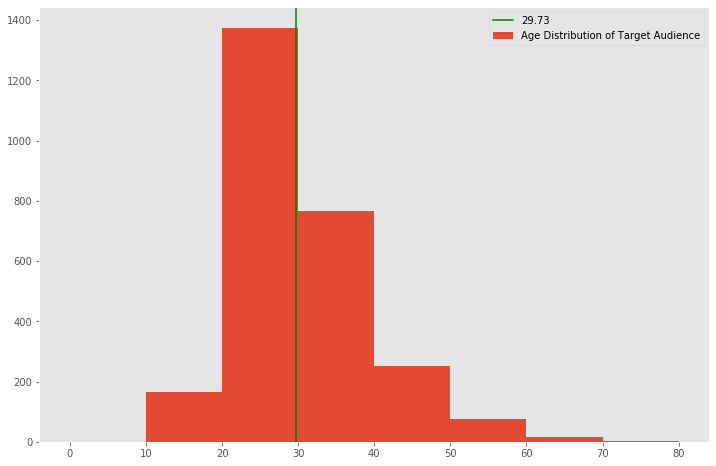

In [44]:
potential_customers["Age"].hist(grid=False, label="Age Distribution of Target Audience", bins=range(0,81,10), figsize=(12,8))
plt.axvline(potential_customers["Age"].mean(), c="Green", label=round(potential_customers["Age"].mean(), 2))
plt.legend()

Unsurprisingly, most of our customers tend to be on the younger side with an average of ~30 and most of them are in their 20s. We will visit this to determine marketing means later on. Now, to determine the best market, we will take a look at the countries these people live in. We will only plot countries that have appeared around 1% of the time and more.

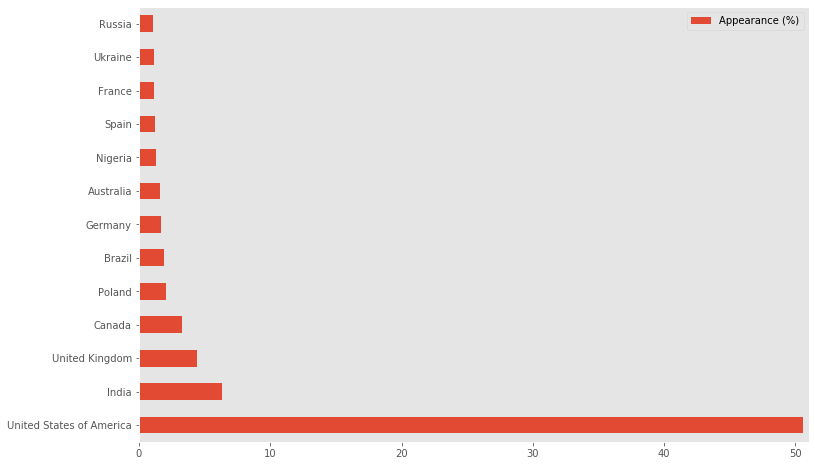

In [45]:
countries_dist = potential_customers["CountryLive"].value_counts(normalize=True).sort_values(ascending=False).apply(lambda x: round(x * 100, 2))
countries_dist = countries_dist[countries_dist[:] > 1]
countries_dist.plot.barh(xlim=(0, 51), grid=False, label="Appearance (%)", figsize=(12,8))
plt.legend()

As we can see above, US students form a huge part of our market, followed by India, UK and Canada. These countries all have a lot in common, including high English proficiencies. Surprisingly, later comes Poland despite very low population compared to most other countries that more than 1% of our target audience is from.

Let's see what genders form our audience since this might also help us with marketing strategies later on:

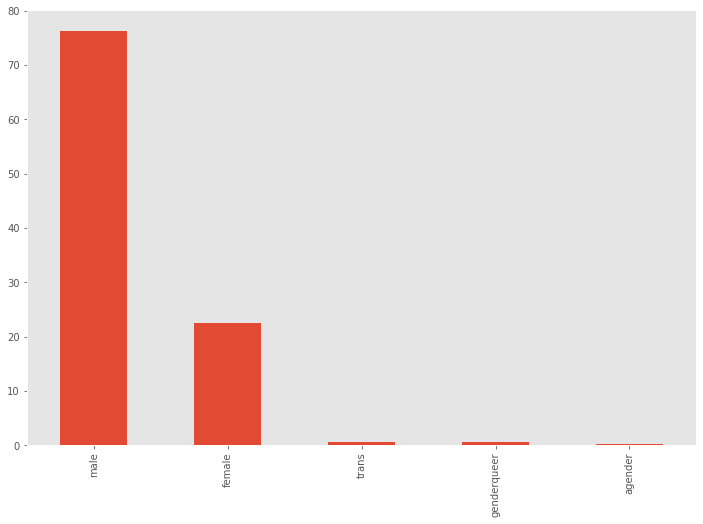

In [46]:
potential_customers["Gender"].value_counts(normalize=True).apply(lambda x: round(x * 100, 2)).plot.bar(grid=False, figsize=(12,8))

As we can see, most of the survey attendants that fit our criteria are male followed by females and LGBTQ+ members. Sadly, however, while males form around 75% of our population of interest, other gender categories form a very little portion compared.

Moving on to education levels:

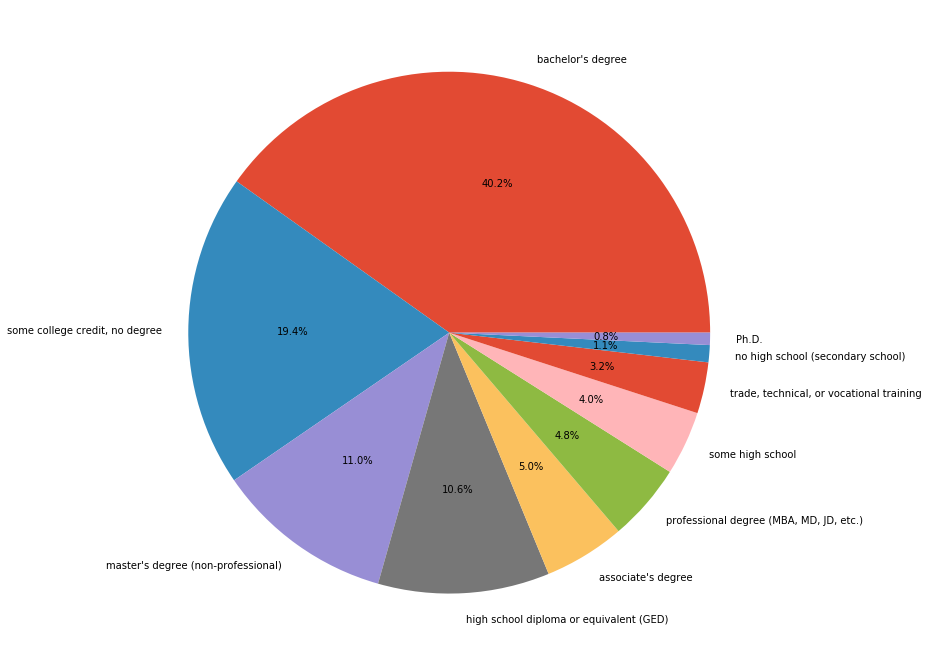

In [47]:
potential_customers["SchoolDegree"].value_counts(normalize=True).apply(lambda x: round(x * 100, 2)).plot.pie(figsize=(12,12), autopct='%1.1f%%', label="")


We can conclude from the pie chart above that most people have some higher education experience followed by a 10.6% of people who have graduated from high school.

Let's dive a little further on "CountryLive" column. We will group budgets of our students by countries they live in:

In [48]:
country_budgets = potential_customers[["CountryLive", "MoneyForLearning"]].groupby(by="CountryLive").mean().sort_values(by="MoneyForLearning", ascending=False)
country_budgets.head()

,MoneyForLearning
CountryLive,
Sri Lanka,2600.000000
Niger,2514.500000
Israel,2309.500000
Taiwan,1966.666667
Portugal,1955.714286


We have aggregated students' budgets using mean values for each country and the results are surprising. Since we will not be marketing in every country in the list, we will limit the results to the countries that form more than 1% of our targeted audience, again. Let's plot the results to see our targets' budgets.

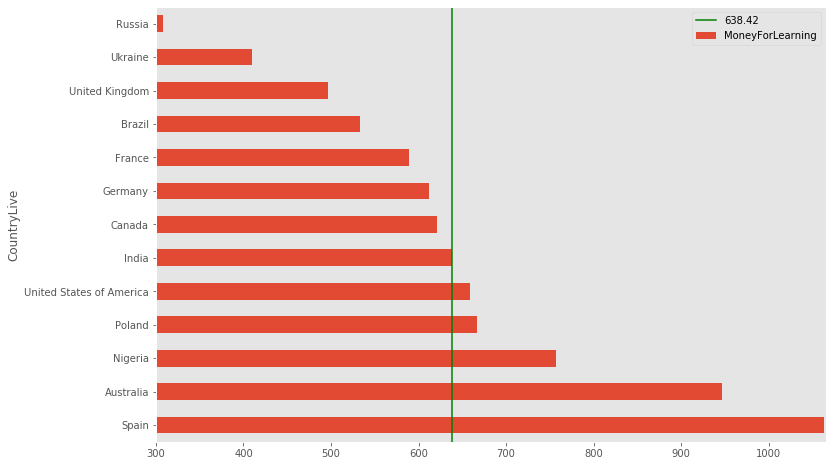

In [49]:
targeted_countries = [x for x in countries_dist.index]

country_budgets_targeted = country_budgets.loc[targeted_countries].sort_values(by="MoneyForLearning", ascending=False)
country_budgets_targeted.plot.barh(xlim=(300, 1065), grid=False, label="Student Budgets", figsize=(12,8))
plt.axvline(country_budgets_targeted["MoneyForLearning"].mean(), c="Green", label=round(country_budgets_targeted["MoneyForLearning"].mean(), 2))
plt.legend()

As we can see above, students from Spain, Australia and Nigeria seem to have the highest budgets followed by 4 countries that had the highest potential customer populations with an exception of UK which has the third lowest budget for this. The mean value of students from these countries is around \\$640. Since we assume that our programs last 4-6 months, this makes around \\$100 - \\$160 per month. Note that the price includes all the external resources, resume reviews, career consultant fees, etc.. When all taken into accord, this is still a very good price for an e-learning site.

Let's multiply the student budgets with the percentiles to see how much potential a country holds:

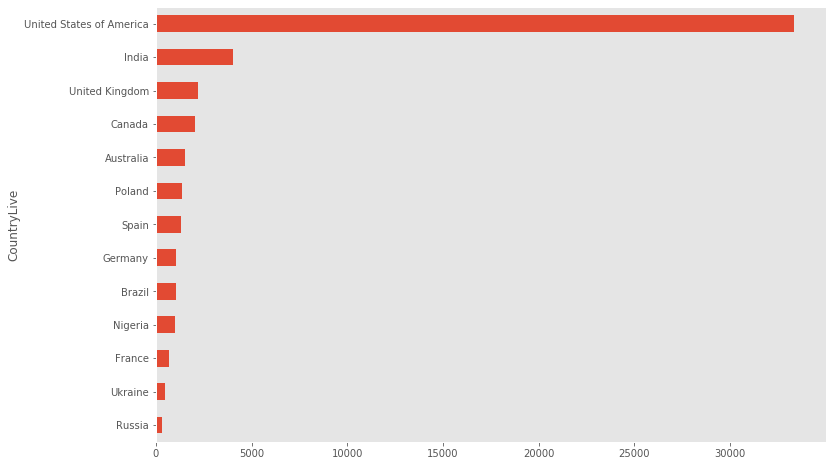

In [50]:
country_potentials = country_budgets_targeted.join(countries_dist)
country_potentials.rename({"CountryLive": "Percentile"}, axis=1, inplace=True)
country_potentials["Potential"] = country_potentials["MoneyForLearning"] * country_potentials["Percentile"]
country_potentials.sort_values(by="Potential", axis=0, inplace=True)
country_potentials["Potential"].plot.barh(figsize=(12,8), grid=False)

As we can see in the plot above, top 4 countries with highest student populations also hold the highest potential, with Poland who ranked #5 in the appearance plot ranking lower and Australia ranking higher in this plot. Let's plot percentages to see a clearer image:

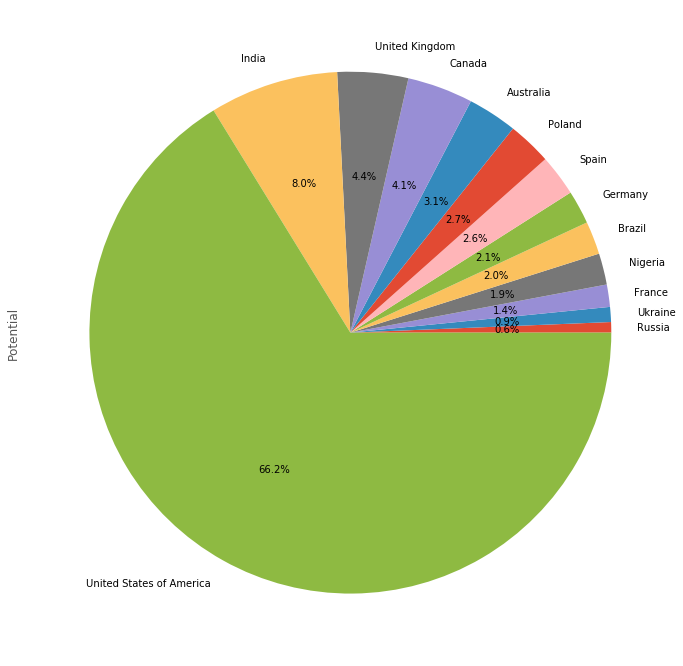

In [51]:
country_potentials["Potential"].plot.pie(figsize=(12,12), autopct='%1.1f%%')

We can conclude from the pie plot above that US holds a GREAT potential for us to target, followed by India with an 8%.

# 3. Conclusions

In this project, we have assumed that we are an e-learning platform that is looking for a target audience that has a certain budget (see markdown below cell 29). Our conclusions from the data we've plotted and analyzed include:

* US, India and UK hold more than 75% of the potential when market size and student budgets taken into account.
* People with high school diplomas and higher education experience form a huge portion of the market.
* About 70% of potential buyers are males, followed by females with more than 20%.
* An average potential customer is of age 30 with most of them being in their 20s.